In [0]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.externals.six import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [27]:
for col in df.columns:
    count = df[df[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))
print ('{} - размер датасета'.format(df.shape))

longitude  -  0
latitude  -  0
housing_median_age  -  0
total_rooms  -  0
total_bedrooms  -  0
population  -  0
households  -  0
median_income  -  0
median_house_value  -  0
ocean_proximity  -  0
(20433, 10) - размер датасета


In [0]:
df = pd.read_csv('housing.csv', error_bad_lines=False, comment='#')
df = df.dropna(axis=0, how='any')

In [28]:
for col in df.columns:
    count = df[df[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))
print ('{} - размер датасета'.format(df.shape))
#df.drop(columns='id', inplace = True);
#df.drop(columns='Cabin', inplace= True)


longitude  -  0
latitude  -  0
housing_median_age  -  0
total_rooms  -  0
total_bedrooms  -  0
population  -  0
households  -  0
median_income  -  0
median_house_value  -  0
ocean_proximity  -  0
(20433, 10) - размер датасета


In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [0]:
df.reset_index(drop=True, inplace=True)

Кодируем категориальные признаки


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
oc = le.fit_transform(df['ocean_proximity'])
ocean = pd.DataFrame({'ocean_proximity' : oc.T})
np.unique(oc)

array([0, 1, 2, 3, 4])

In [33]:
del df['ocean_proximity']
df = df.join(ocean)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [45]:
from sklearn.preprocessing import MinMaxScaler
features


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


Построим парные статистики 


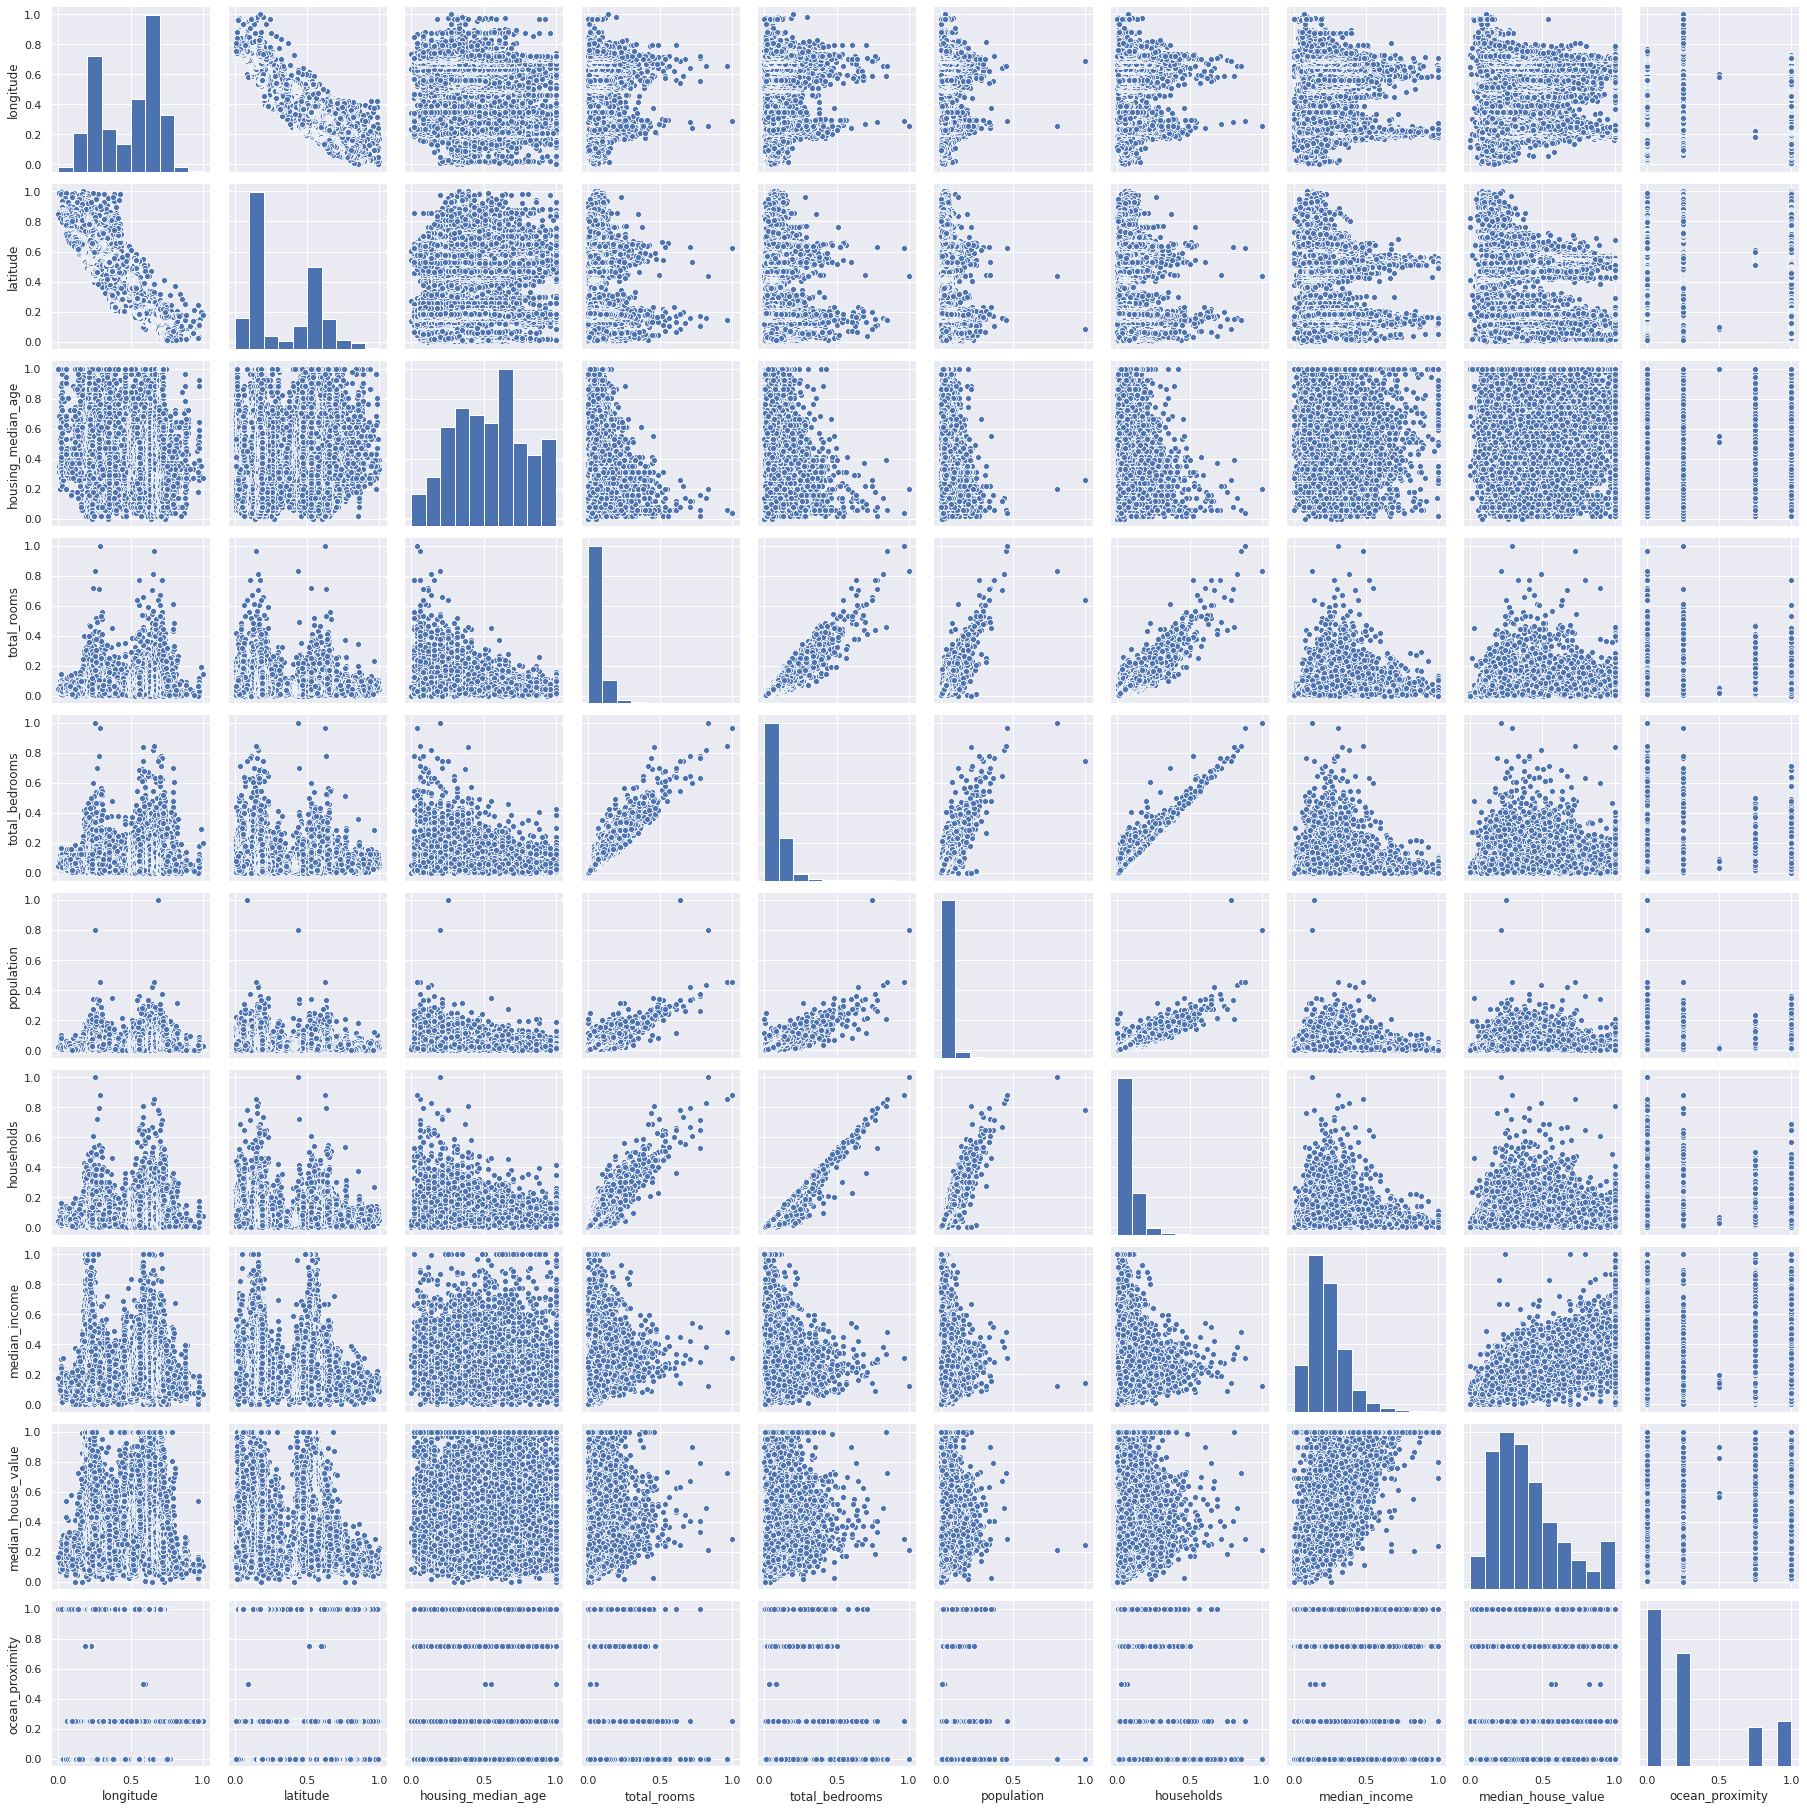

In [57]:
sns.pairplot(df)

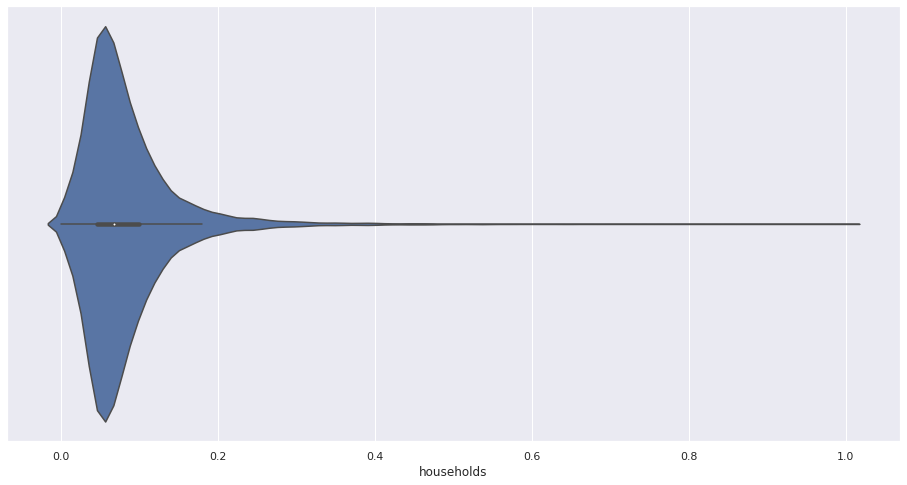

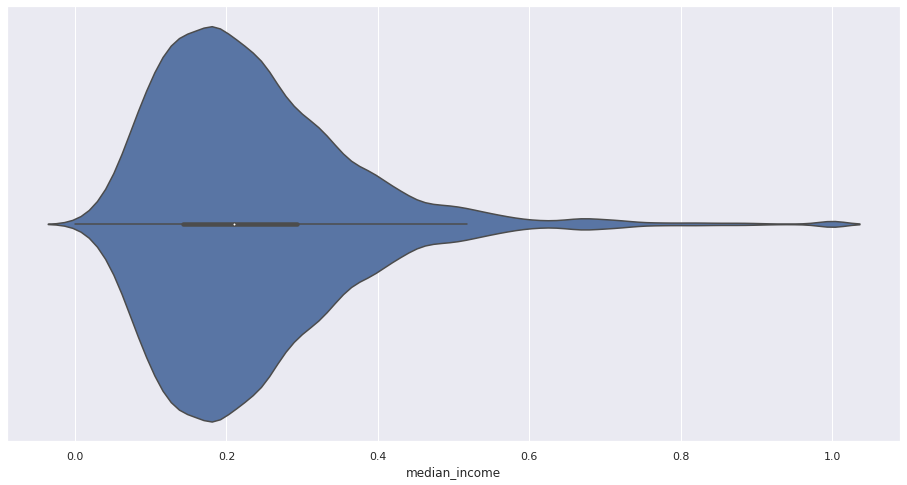

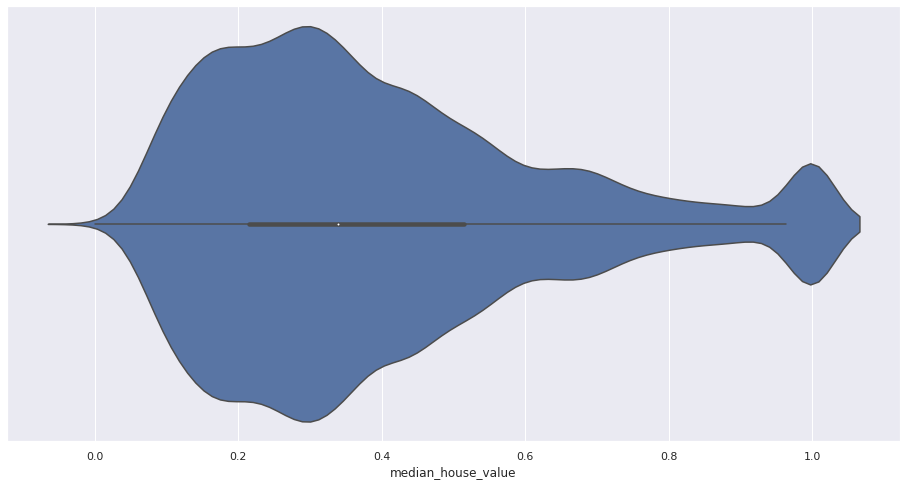

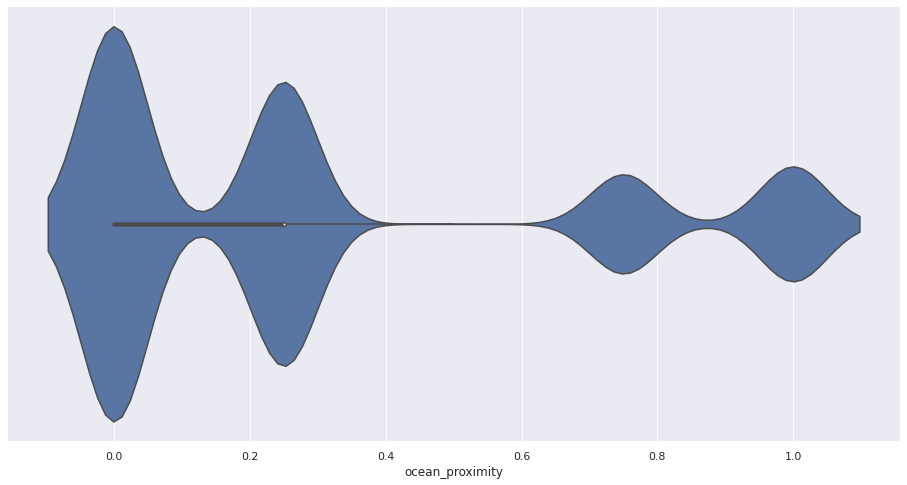

In [61]:
# Скрипичные диаграммы для числовых колонок
for col in ['households',	'median_income', 'median_house_value','ocean_proximity']:
    sns.violinplot(x=df[col])
    plt.show()

Произведем масштабирование


In [52]:
scal= MinMaxScaler()
s = scal.fit_transform(df)
df = pd.DataFrame(s, columns= ['longitude',	'latitude',	'housing_median_age',	'total_rooms'	,'total_bedrooms'	,'population'	,'households',	'median_income', 'median_house_value','ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75
...,...,...,...,...,...,...,...,...,...,...
20428,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.25
20429,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.25
20430,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.25
20431,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.25


In [55]:
features = df.drop(columns='median_house_value')
target = df.median_house_value


0        0.902266
1        0.708247
2        0.695051
3        0.672783
4        0.674638
           ...   
20428    0.130105
20429    0.128043
20430    0.159383
20431    0.143713
20432    0.153403
Name: median_house_value, Length: 20433, dtype: float64

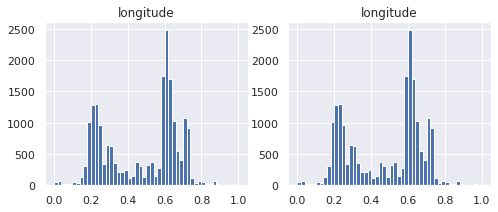

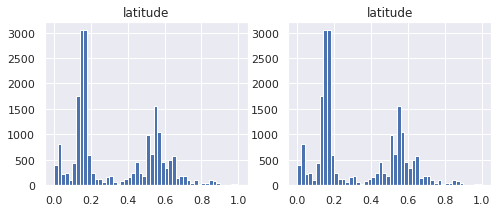

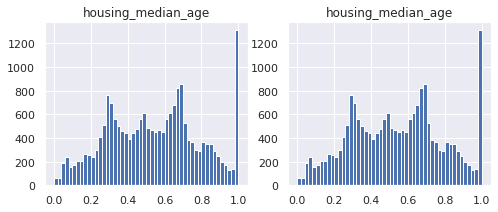

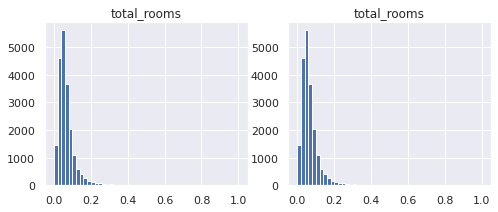

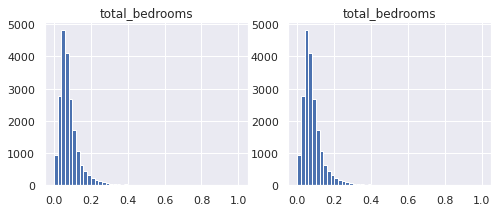

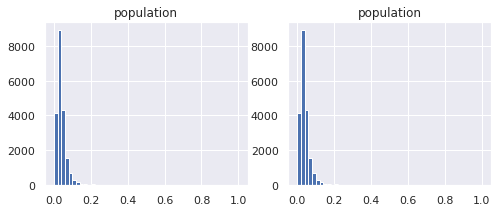

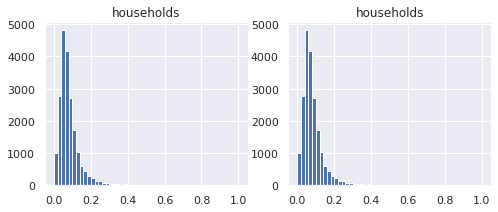

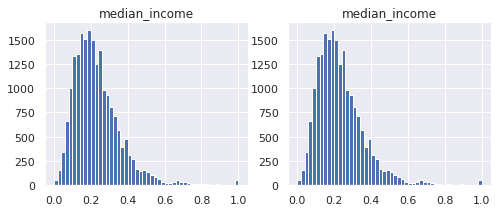

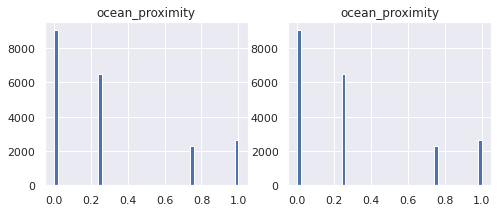

In [64]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in features:
    col_scaled = col 

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(features[col], 50)
    ax[1].hist(features[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state = 1)

In [65]:
target_df = pd.DataFrame(target, columns=['median_house_value'])
df_merge = features.join(target_df)
df_merge

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75,0.674638
...,...,...,...,...,...,...,...,...,...,...
20428,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25,0.130105
20429,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25,0.128043
20430,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25,0.159383
20431,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25,0.143713


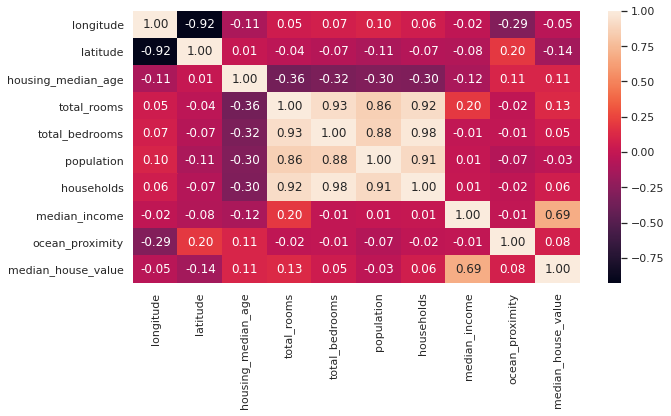

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_merge.corr(), annot=True, fmt='.2f')

In [86]:
# Выборки для задачи регресии
regr_X_train = X_train
regr_X_test = X_test
regr_Y_train = y_train
regr_Y_test = y_test
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((16346, 9), (4087, 9), (16346,), (4087,))

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show() 

In [0]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [0]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [0]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

Построим несколько моделей МО 


1.   Линейная регрессия
2.   Метод ближайших соседей
3.   Метод опорных векторов
4.   Случайный лес
5.   Решающее дерево
6.   Градиентный бустинг


In [91]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=0.104, MSE=0.02, R2=0.645
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=0.085, MSE=0.016, R2=0.714
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=0.085, MSE=0.015, R2=0.741
*****************************************************
*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max

### Подбор гиперпараметров

 KNeighbors


In [138]:
n_range = np.array(range(1,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
         86, 91, 96])}]

In [139]:
regr_gs_KN = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_KN.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [140]:
# Лучшая модель
regr_gs_KN.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [141]:
# Лучшее значение параметров
regr_gs_KN.best_params_

{'n_neighbors': 11}

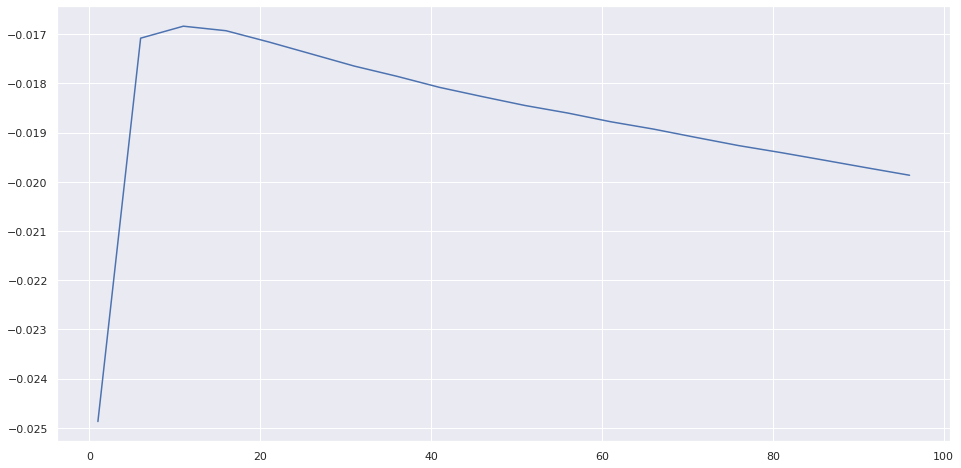

In [142]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs_KN.cv_results_['mean_test_score'])

DecisionTree


In [151]:
n_range = np.array(range(1,50,3))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])}]

In [156]:
regr_gs_DT = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_DT.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])}],
             pre_dispatch='2*n_jobs',

In [177]:
# Лучшая модель
regr_gs_DT.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [158]:
# Лучшее значение параметров
regr_gs_DT.best_params_

{'max_depth': 10}

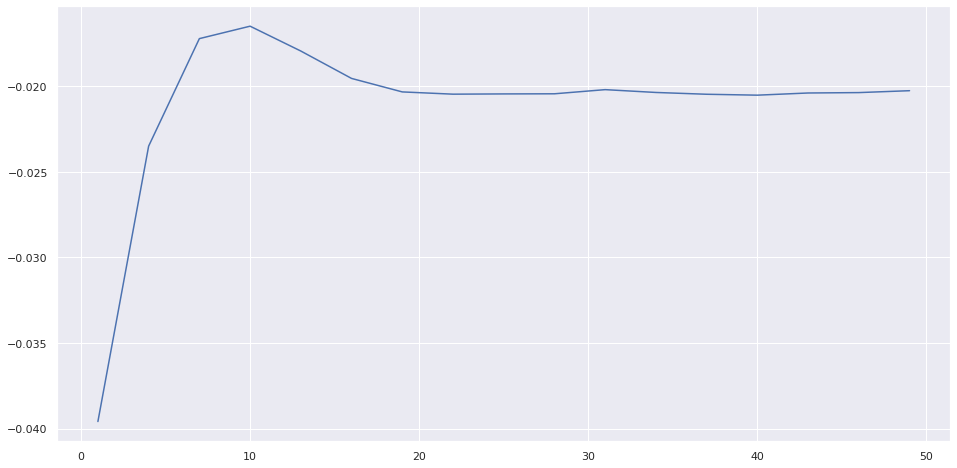

In [159]:
#Изменение качества на тестовой выборке в зависимости от глубины
plt.plot(n_range, regr_gs_DT.cv_results_['mean_test_score'])

SVM

In [178]:
n_range1 = np.array(range(1,5,1))
n_range2 = np.array(range(1,10,1))*0.1
tuned_parameters = [{'degree': n_range1}, {'gamma' : n_range2}]
tuned_parameters


[{'degree': array([1, 2, 3, 4])},
 {'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}]

In [179]:
regr_gs_SVR = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_SVR.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'degree': array([1, 2, 3, 4])},
                         {'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [180]:
# Лучшая модель
regr_gs_SVR.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [145]:
# Лучшее значение параметров
regr_gs_SVR.best_params_

{'degree': 1}

In [0]:
#Изменение качества на тестовой выборке в зависимости от глубины
plt.plot(n_range1, regr_gs_SVR.cv_results_)

RandomForestRegressor
max_depth

In [183]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [184]:
regr_gs_RFR = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_RFR.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [185]:
# Лучшая модель
regr_gs_RFR.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [186]:
regr_gs_RFR.best_params_

{'max_depth': 9}

GradientBoostingRegresso

In [187]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [188]:
regr_gs_GBR = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_GBR.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [189]:
regr_gs_GBR.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=9,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [190]:
regr_gs_GBR.best_params_

{'max_depth': 9}

LinearRegression


In [197]:
n_range = np.array(range(1,10,1))*0.1
tuned_parameters = [{'n_jobs': n_range}]
tuned_parameters

[{'n_jobs': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}]

In [198]:
regr_gs_LR = GridSearchCV(LinearRegression(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs_LR.fit(regr_X_train, regr_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_jobs': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [199]:
regr_gs_LR.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0.1, normalize=False)

In [200]:
regr_gs_LR.best_params_

{'n_jobs': 0.1}

### Повторение построения базового решения для задачи регресии





In [0]:
regr_models_grid = {'KNN_801':regr_gs_KN.best_estimator_,
                    'LR':regr_gs_LR.best_estimator_,
                    'SVR':regr_gs_SVR.best_estimator_,
                    'RFR':regr_gs_RFR.best_estimator_,
                    'GBR' : regr_gs_GBR.best_estimator_,
                    'LR' : regr_gs_LR.best_estimator_
                    }

In [202]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

MAE=0.085, MSE=0.016, R2=0.722
*****************************************************
*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0.1, normalize=False)

MAE=0.104, MSE=0.02, R2=0.645
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=0.085, MSE=0.015, R2=0.741
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_featu

Решение задачи регрессии

In [203]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

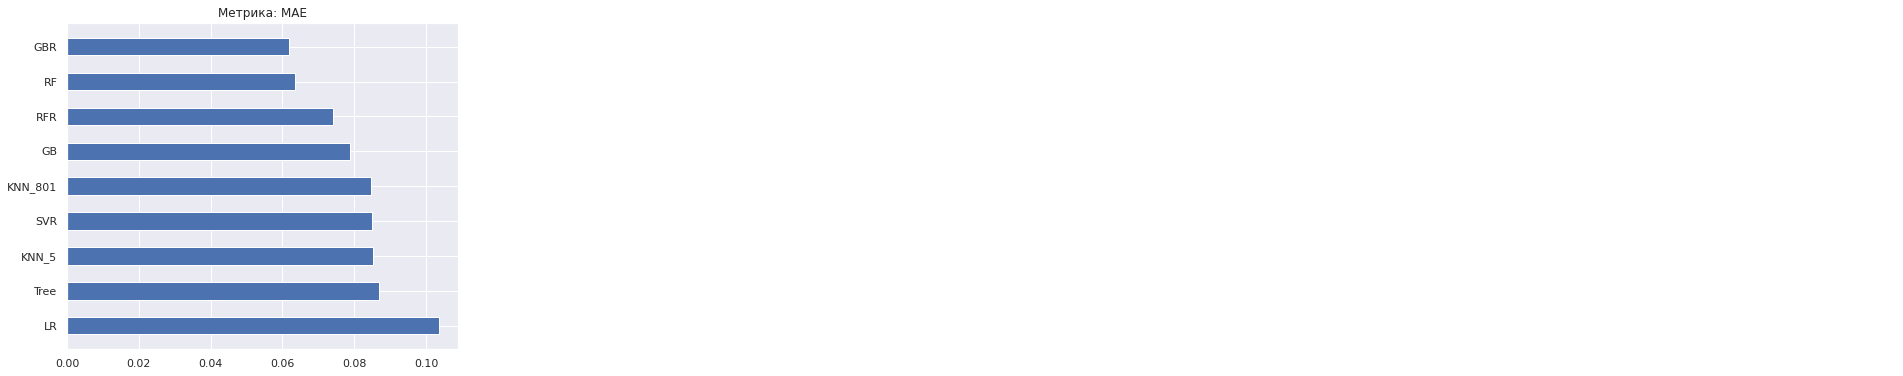

In [204]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

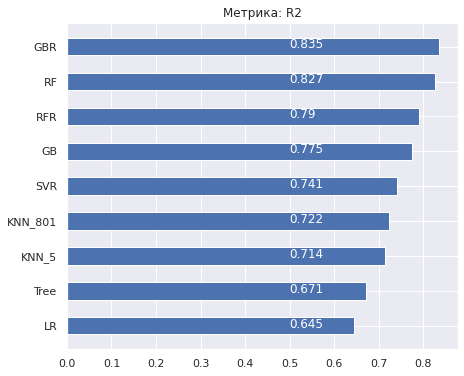

In [209]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

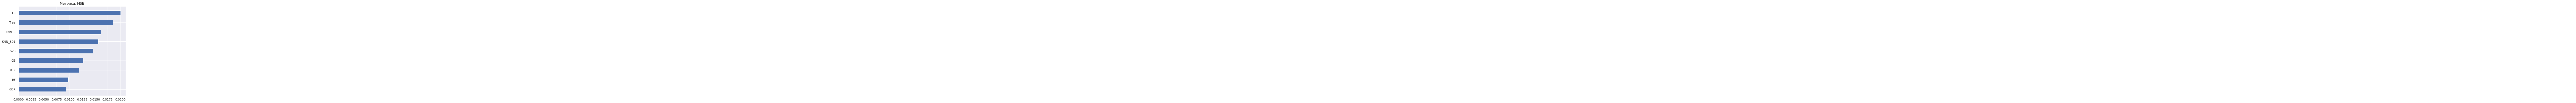

In [211]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=True, figsize=(7, 6))

Как видно из гистограмм наилучшим методом будет линейная регрессия либо градиентный бустинг 

In [228]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
